# Learn Posture

use machine learning to recognize robot's posture (following the example in [scikit-learn-intro.ipynb](./scikit-learn-intro.ipynb) )

## 1. Data collection

We have colleceted data before, you need to add new data if you want to add new posture.

* the dateset are in *robot_pose_data* folder
* each file contains the data belongs to this posture, e.g. the data in *Back* file are collected when robot was in "Back" posture
* the data file can be load by ```pickle```, e.g. ```pickle.load(open('Back'))```, the data is a list of feature data
* the features (e.g. each row of the data) are ['LHipYawPitch', 'LHipRoll', 'LHipPitch', 'LKneePitch', 'RHipYawPitch', 'RHipRoll', 'RHipPitch', 'RKneePitch', 'AngleX', 'AngleY'], where 'AngleX' and 'AngleY' are body angle (e.g. ```Perception.imu```) and others are joint angles.

## 2. Data preprocessing

In [31]:
import pickle
from os import listdir, path
import numpy as np
from sklearn import svm, metrics, model_selection
import matplotlib.pyplot as plt

ROBOT_POSE_DATA_DIR = 'robot_pose_data'

In [2]:
classes = listdir(ROBOT_POSE_DATA_DIR)
print classes

['Left', 'Crouch', 'Sit', 'Stand', 'StandInit', 'Knee', 'Frog', 'HeadBack', 'Belly', 'Back', 'Right']


In [3]:
def load_pose_data(i):
    '''load pose data from file'''
    data = []
    target = []
    # YOUR CODE HERE
    
    filename = path.join(ROBOT_POSE_DATA_DIR, classes[i])
    data = pickle.load(open(filename))
    target = [i] * len(data)
    return data, target

In [15]:
# load all the data
all_data = []
all_target = []
for i in range(len(classes)):
    data, target = load_pose_data(i)
    all_data.extend(data)
    all_target.extend(target)

all_data = np.array(all_data)
all_target = np.array(all_target)
print 'total number of data', len(all_data)

total number of data 222


In [19]:
# shuffule data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(all_data, all_target, test_size=0.3)
print(train_X.shape, train_Y.shape)

((155, 10), (155,))


## 3. Learn on training data

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T). An example of an estimator is the class sklearn.svm.SVC that implements support vector classification.

In [20]:
clf = svm.SVC(gamma=0.001, C=100.)

### learning

In [21]:
clf.fit(train_X, train_Y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### predicting

In [26]:
clf.predict([train_X[-1]]), train_Y[-1]

(array([4]), 4)

In [35]:
def evaluate(expected, predicted):
    print("Classification report:\n%s\n" % metrics.classification_report(expected, predicted))

    confusion_matrix = metrics.confusion_matrix(expected, predicted)
    print("Confusion matrix:\n%s" % confusion_matrix)
    plt.imshow(confusion_matrix)
    plt.colorbar()

## 4. Evaluate on the test data

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      0.77      0.87        13
           3       1.00      1.00      1.00         4
           4       0.86      1.00      0.92        18
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         3

   micro avg       0.96      0.96      0.96        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.96      0.96      0.95        67


Confusion matrix:
[[ 6  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  3  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0]
 

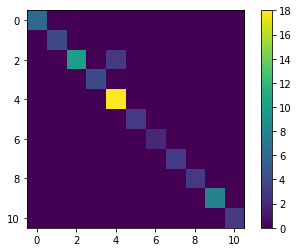

In [42]:
evaluate(test_Y, clf.predict(test_X))

In [45]:
print(classes[2], classes[4])

('Sit', 'StandInit')


## 5. Deploy to the real system

We can simple use `pickle` module to serialize the trained classifier.

In [46]:
import pickle
ROBOT_POSE_CLF = 'robot_pose.pkl'
pickle.dump({'classes': classes, 'classifier': clf}, open(ROBOT_POSE_CLF, 'w'))

Then, in the application we can load the trained classifier again.

In [47]:
clf2 = pickle.load(open(ROBOT_POSE_CLF))['classifier']
clf2.predict(all_data[1][np.newaxis, :]), all_target[1]

(array([0]), 0)